In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

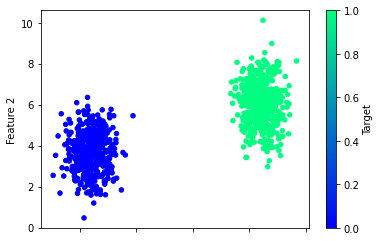

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 650us/step - loss: 0.6971 - accuracy: 0.0840
Epoch 2/100
24/24 [==============================] - 0s 476us/step - loss: 0.6913 - accuracy: 0.5067
Epoch 3/100
24/24 [==============================] - 0s 477us/step - loss: 0.6855 - accuracy: 0.5067
Epoch 4/100
24/24 [==============================] - 0s 520us/step - loss: 0.6784 - accuracy: 0.5067
Epoch 5/100
24/24 [==============================] - 0s 477us/step - loss: 0.6697 - accuracy: 0.5067
Epoch 6/100
24/24 [==============================] - 0s 477us/step - loss: 0.6594 - accuracy: 0.5067
Epoch 7/100
24/24 [==============================] - 0s 520us/step - loss: 0.6478 - accuracy: 0.5067
Epoch 8/100
24/24 [==============================] - 0s 477us/step - loss: 0.6348 - accuracy: 0.9813
Epoch 9/100
24/24 [==============================] - 0s 543us/step - loss: 0.6210 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 477us/step - loss: 0.6059 - accura

24/24 [==============================] - 0s 477us/step - loss: 0.1025 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 477us/step - loss: 0.1007 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 477us/step - loss: 0.0990 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 435us/step - loss: 0.0974 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 519us/step - loss: 0.0958 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 564us/step - loss: 0.0942 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 564us/step - loss: 0.0927 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 477us/step - loss: 0.0912 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 520us/step - loss: 0.0897 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 737us/step - loss: 0.0882 - accuracy: 

<AxesSubplot:>

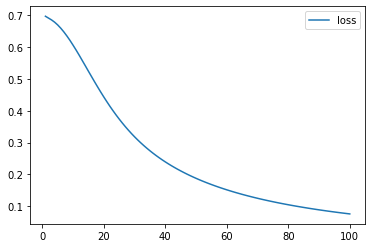

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

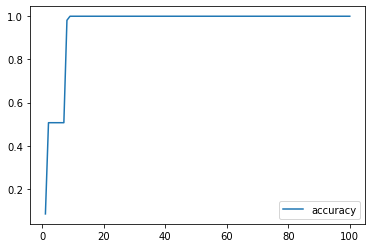

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0770 - accuracy: 1.0000
Loss: 0.07700257003307343, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

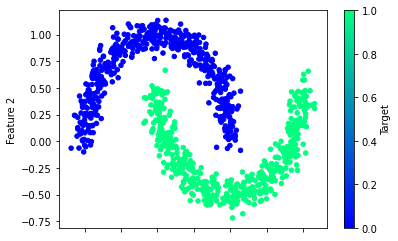

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 953us/step - loss: 1.0016 - accuracy: 0.5053
Epoch 2/100
24/24 [==============================] - 0s 958us/step - loss: 0.9178 - accuracy: 0.5200
Epoch 3/100
24/24 [==============================] - 0s 712us/step - loss: 0.8569 - accuracy: 0.5267
Epoch 4/100
24/24 [==============================] - 0s 737us/step - loss: 0.8142 - accuracy: 0.5347
Epoch 5/100
24/24 [==============================] - 0s 737us/step - loss: 0.7810 - accuracy: 0.5440
Epoch 6/100
24/24 [==============================] - 0s 784us/step - loss: 0.7538 - accuracy: 0.5507
Epoch 7/100
24/24 [==============================] - 0s 867us/step - loss: 0.7307 - accuracy: 0.5533
Epoch 8/100
24/24 [==============================] - 0s 781us/step - loss: 0.7107 - accuracy: 0.5627
Epoch 9/100
24/24 [==============================] - 0s 781us/step - loss: 0.6936 - accuracy: 0.5720
Epoch 10/100
24/24 [==============================] - 0s 780us/step - loss: 0.6778 - accura

24/24 [==============================] - 0s 896us/step - loss: 0.3219 - accuracy: 0.8373
Epoch 82/100
24/24 [==============================] - 0s 824us/step - loss: 0.3198 - accuracy: 0.8373
Epoch 83/100
24/24 [==============================] - 0s 824us/step - loss: 0.3178 - accuracy: 0.8373
Epoch 84/100
24/24 [==============================] - 0s 780us/step - loss: 0.3158 - accuracy: 0.8400
Epoch 85/100
24/24 [==============================] - 0s 737us/step - loss: 0.3138 - accuracy: 0.8427
Epoch 86/100
24/24 [==============================] - 0s 781us/step - loss: 0.3120 - accuracy: 0.8440
Epoch 87/100
24/24 [==============================] - 0s 824us/step - loss: 0.3101 - accuracy: 0.8453
Epoch 88/100
24/24 [==============================] - 0s 781us/step - loss: 0.3083 - accuracy: 0.8467
Epoch 89/100
24/24 [==============================] - 0s 737us/step - loss: 0.3066 - accuracy: 0.8493
Epoch 90/100
24/24 [==============================] - 0s 737us/step - loss: 0.3048 - accuracy: 

<AxesSubplot:>

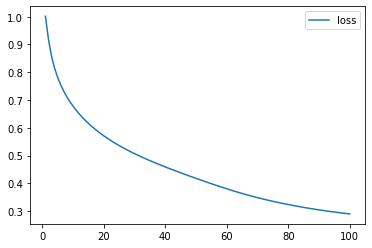

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

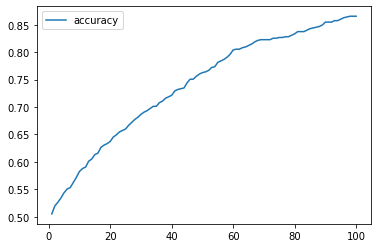

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 671us/step - loss: 0.5857 - accuracy: 0.5920
Epoch 2/100
24/24 [==============================] - 0s 520us/step - loss: 0.5623 - accuracy: 0.6227
Epoch 3/100
24/24 [==============================] - 0s 477us/step - loss: 0.5418 - accuracy: 0.6627
Epoch 4/100
24/24 [==============================] - 0s 477us/step - loss: 0.5223 - accuracy: 0.6973
Epoch 5/100
24/24 [==============================] - 0s 520us/step - loss: 0.5035 - accuracy: 0.7333
Epoch 6/100
24/24 [==============================] - 0s 477us/step - loss: 0.4845 - accuracy: 0.7533
Epoch 7/100
24/24 [==============================] - 0s 477us/step - loss: 0.4660 - accuracy: 0.7640
Epoch 8/100
24/24 [==============================] - 0s 477us/step - loss: 0.4479 - accuracy: 0.7787
Epoch 9/100
24/24 [==============================] - 0s 520us/step - loss: 0.4307 - accuracy: 0.7880
Epoch 10/100
24/24 [==============================] - 0s 564us/step - loss: 0.4142 - accura

24/24 [==============================] - 0s 520us/step - loss: 0.1611 - accuracy: 0.9387
Epoch 82/100
24/24 [==============================] - 0s 520us/step - loss: 0.1594 - accuracy: 0.9387
Epoch 83/100
24/24 [==============================] - 0s 520us/step - loss: 0.1579 - accuracy: 0.9400
Epoch 84/100
24/24 [==============================] - 0s 564us/step - loss: 0.1564 - accuracy: 0.9400
Epoch 85/100
24/24 [==============================] - 0s 564us/step - loss: 0.1549 - accuracy: 0.9400
Epoch 86/100
24/24 [==============================] - 0s 520us/step - loss: 0.1533 - accuracy: 0.9400
Epoch 87/100
24/24 [==============================] - 0s 520us/step - loss: 0.1519 - accuracy: 0.9413
Epoch 88/100
24/24 [==============================] - 0s 520us/step - loss: 0.1504 - accuracy: 0.9413
Epoch 89/100
24/24 [==============================] - 0s 477us/step - loss: 0.1489 - accuracy: 0.9413
Epoch 90/100
24/24 [==============================] - 0s 477us/step - loss: 0.1475 - accuracy: 